In [1]:
import tensorflow as tf
from tensorflow.keras import Model,layers
import numpy as np
import tensorflow.keras as keras

In [2]:
# initialization
num_class=10
learning_rae=0.001
training_steps=200
batch_size=128
display_step=10
conv1_filter=32 #number of filters for first layer conv1
conv2_filter=16 # number of filter for second layer conv2
fully_connected_layer=1024 #number of nuorons for fully connected

In [3]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train,x_test=np.array(x_train,np.float32),np.array(x_test,np.float32)
x_train,x_test= x_train/255.0,x_test/255.0

In [5]:
train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))# convert to tensor

In [8]:
train_data

<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [9]:
train_data=train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

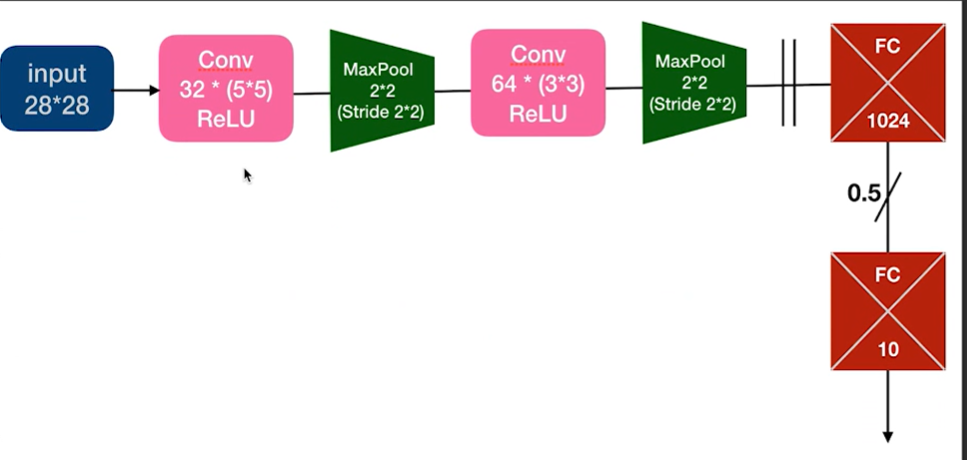

In [10]:
# archtecture above

In [46]:
class ConvNet(Model):

  def __init__(self):
    super(ConvNet,self).__init__()
    self.conv1=layers.Conv2D(32,kernel_size=5,activation=tf.nn.relu)
    self.maxpool1=layers.MaxPool2D(2,strides=2)
    self.conv2=layers.Conv2D(64,kernel_size=3,activation=tf.nn.relu)
    self.maxpool2=layers.MaxPool2D(2,strides=2)
    self.flatten=layers.Flatten()
    self.fc1=layers.Dense(1024)
    self.dropout=layers.Dropout(0.2)
    self.out=layers.Dense(num_class)

  def call(self,x,is_training=False):
    x=tf.reshape(x,[-1,28,28,1])#-1 chon nemidonim che tedad batch miad ,1 ham be khter inke ye channle darim
    x=self.conv1(x)
    x=self.maxpool1(x)
    x=self.conv2(x)
    x=self.maxpool2(x)
    x=self.flatten(x)
    x=self.fc1(x)
    x=self.dropout(x,training=is_training) #faghat zamani ke training hast angam mishe
    x=self.out(x)
    if is_training==False:
      x=tf.nn.softmax(x)
    return x



In [47]:
conv_net=ConvNet()

In [48]:
def cross_entropy_loss(x,y):
  y=tf.cast(y,tf.int64)
  loss=tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=x)
  return tf.reduce_mean(loss)

In [49]:
def accuracy(y_pred,y_true):
  correct_predictions=tf.equal(tf.argmax(y_pred,1),tf.cast(y_true,tf.int64))
  return tf.reduce_mean(tf.cast(correct_predictions,tf.float32),axis=1)

optimizer=tf.optimizers.Adam(learning_rate=learning_rae)

In [ ]:
#optimization

In [50]:
@tf.function
#سرعت رو میبره زیاد میکنه اما پیچیدگی کم
def run_optimization(x,y):
  with tf.GradientTape() as g:
    pred=conv_net(x,is_training=True)
    loss=cross_entropy_loss(pred,y)
  trainable_variables=conv_net.trainable_variables
  gradients=g.gradient(loss,trainable_variables)
  optimizer.apply_gradients(zip(gradients,trainable_variables))

In [28]:
#run training

In [57]:
for step,(batch_x,batch_y) in enumerate(train_data.take(training_steps),1):
  run_optimization(batch_x,batch_y)
  if step % display_step==0:
    pred=conv_net(batch_x)
    loss=cross_entropy_loss(pred,batch_y)
    # acc=accuracy(pred,batch_y)
    print(step,pred,loss)


10 tf.Tensor(
[[2.5404250e-07 7.7768027e-06 7.4993079e-07 ... 6.4585474e-05
  1.2523087e-04 9.9781275e-01]
 [1.4574574e-06 9.9920386e-01 3.5159258e-06 ... 1.7850757e-04
  3.8588809e-05 1.1671408e-04]
 [7.0600852e-04 9.2541857e-05 1.2765224e-04 ... 5.8064517e-04
  3.7433176e-05 1.1223684e-04]
 ...
 [1.0742911e-09 5.5953359e-07 9.9985385e-01 ... 6.5608816e-08
  1.7804689e-07 3.6906223e-10]
 [1.6078275e-05 3.4433631e-03 6.8956874e-02 ... 9.2168212e-01
  3.7930226e-05 5.6276238e-04]
 [1.2394432e-04 3.6444512e-06 5.9481332e-05 ... 1.3442528e-09
  8.5591950e-05 1.6579035e-08]], shape=(128, 10), dtype=float32) tf.Tensor(1.4785411, shape=(), dtype=float32)
20 tf.Tensor(
[[2.3770598e-11 7.6269226e-13 6.0982586e-07 ... 1.1086715e-09
  2.4825349e-04 7.6510851e-08]
 [3.9215774e-06 5.6509091e-09 5.6576499e-07 ... 2.5701856e-06
  9.9995416e-01 3.8166530e-05]
 [1.1963796e-11 1.4984258e-07 7.7659862e-10 ... 6.2169948e-07
  7.8200328e-06 2.4349040e-04]
 ...
 [1.3247267e-06 6.4661009e-08 3.6967256e-06 .

In [54]:
import matplotlib.pyplot as plt